# Layers

## BatchNorm

## Convolution

there is 2 major component
1. kernel(filter)
1. stride

In [3]:
# This code demonstrates how Convolution works.
# Assume we have an image of 4 X 4 and a filter of 2 X 2 with Stride = 1.

def conv_filter_output(input_img_section, filter_value):
    # This method performs the multiplication of input and filter.
    # Returns a singular value.
    value = 0
    for i in range(len(filter_value)):
        for j in range(len(filter_value[0])):
            value += input_img_section[i][j] * filter_value[i][j]
    return value

img_input = [
    [260.745, 261.332, 112.27, 262.351],
    [260.302, 208.802, 139.05, 230.709],
    [261.775, 93.73, 166.118, 122.847],
    [259.56, 232.038, 262.351, 228.937]
]

filter_matrix = [
    [1, 0],
    [0, 1]
]

filterX, filterY = len(filter_matrix), len(filter_matrix[0])
filtered_result = []

for i in range(0, len(img_input) - filterX + 1):
    column = []
    for j in range(0, len(img_input[0]) - filterY + 1):
        # Corrected the slicing here
        input_section = [row[j:j+filterY] for row in img_input[i:i+filterX]]
        column.append(conv_filter_output(input_section, filter_matrix))
    filtered_result.append(column)

print(filtered_result)


[[469.547, 400.382, 342.979], [354.03200000000004, 374.91999999999996, 261.897], [493.813, 356.081, 395.055]]


In [4]:
import numpy as np

def convolve(image, filter_matrix):
    image_height, image_width = len(image), len(image[0])
    filter_height, filter_width = len(filter_matrix), len(filter_matrix[0])

    result_height = image_height - filter_height + 1
    result_width = image_width - filter_width + 1

    result = np.zeros((result_height, result_width))

    for i in range(result_height):
        for j in range(result_width):
            image_section = image[i:i+filter_height, j:j+filter_width]
            result[i, j] = np.sum(image_section * filter_matrix)

    return result

# Assuming a 4x4 image
image = np.array([
    [260.745, 261.332, 112.27, 262.351],
    [260.302, 208.802, 139.05, 230.709],
    [261.775, 93.73, 166.118, 122.847],
    [259.56, 232.038, 262.351, 228.937]
])

# Assuming a 2x2 filter
filter_matrix = np.array([
    [1, 0],
    [0, 1]
])

# Perform convolution
result = convolve(image, filter_matrix)

# Display the result
print("Original Image:")
print(image)
print("\nFilter:")
print(filter_matrix)
print("\nResult after Convolution:")
print(result)


Original Image:
[[260.745 261.332 112.27  262.351]
 [260.302 208.802 139.05  230.709]
 [261.775  93.73  166.118 122.847]
 [259.56  232.038 262.351 228.937]]

Filter:
[[1 0]
 [0 1]]

Result after Convolution:
[[469.547 400.382 342.979]
 [354.032 374.92  261.897]
 [493.813 356.081 395.055]]


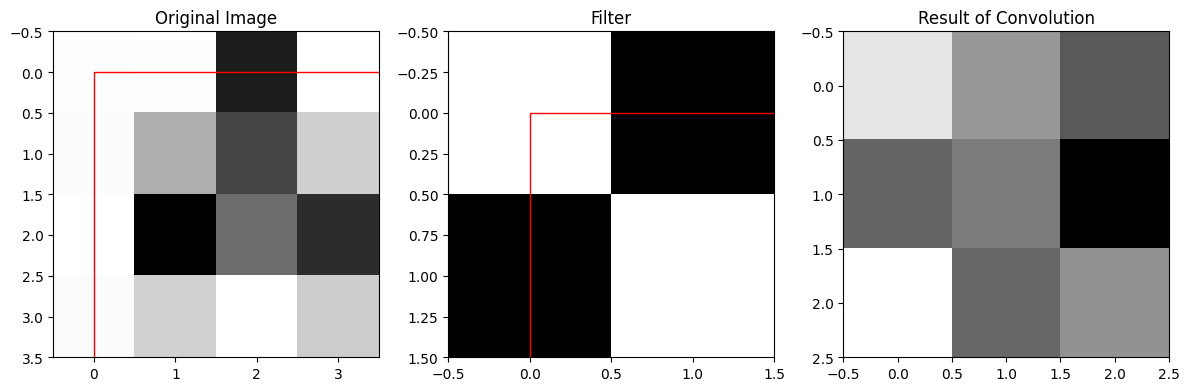

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_convolution(image, filter_matrix, result):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    # Plot Original Image
    ax[0].imshow(image, cmap='gray', interpolation='nearest')
    ax[0].set_title('Original Image')

    # Plot Filter
    ax[1].imshow(filter_matrix, cmap='gray', interpolation='nearest')
    ax[1].set_title('Filter')

    # Plot Result of Convolution
    ax[2].imshow(result, cmap='gray', interpolation='nearest')
    ax[2].set_title('Result of Convolution')

    # Add rectangles to highlight regions in the images
    rect_original = Rectangle((0, 0), image.shape[1], image.shape[0], linewidth=1, edgecolor='r', facecolor='none')
    rect_filter = Rectangle((0, 0), filter_matrix.shape[1], filter_matrix.shape[0], linewidth=1, edgecolor='r', facecolor='none')

    ax[0].add_patch(rect_original)
    ax[1].add_patch(rect_filter)

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

# Assuming a 4x4 image
image = np.array([
    [260.745, 261.332, 112.27, 262.351],
    [260.302, 208.802, 139.05, 230.709],
    [261.775, 93.73, 166.118, 122.847],
    [259.56, 232.038, 262.351, 228.937]
])

# Assuming a 2x2 filter
filter_matrix = np.array([
    [1, 0],
    [0, 1]
])

# Perform convolution
result = convolve(image, filter_matrix)

# Visualize the images and result
visualize_convolution(image, filter_matrix, result)


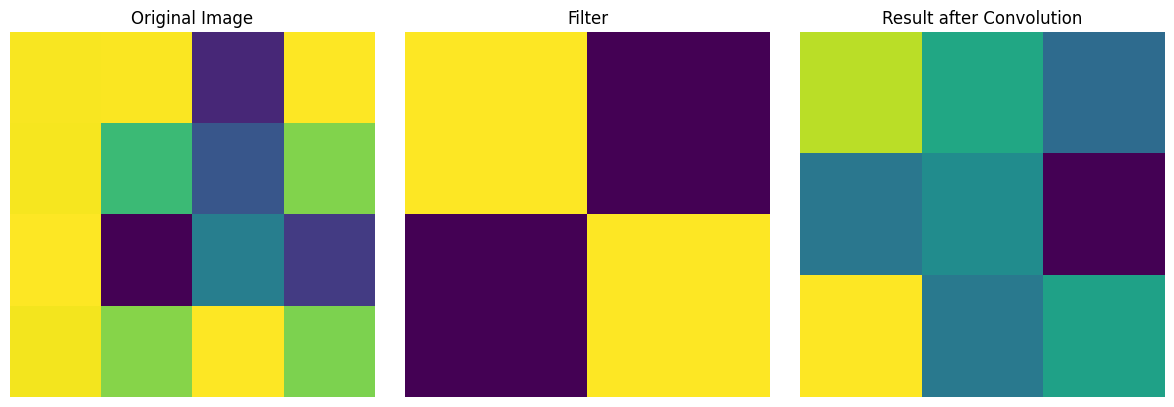

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def convolve(image, filter_matrix):
    image_height, image_width = len(image), len(image[0])
    filter_height, filter_width = len(filter_matrix), len(filter_matrix[0])

    result_height = image_height - filter_height + 1
    result_width = image_width - filter_width + 1

    result = np.zeros((result_height, result_width))

    for i in range(result_height):
        for j in range(result_width):
            image_section = image[i:i+filter_height, j:j+filter_width]
            result[i, j] = np.sum(image_section * filter_matrix)

    return result

# Assuming a 4x4 image
image = np.array([
    [260.745, 261.332, 112.27, 262.351],
    [260.302, 208.802, 139.05, 230.709],
    [261.775, 93.73, 166.118, 122.847],
    [259.56, 232.038, 262.351, 228.937]
])

# Assuming a 2x2 filter
filter_matrix = np.array([
    [1, 0],
    [0, 1]
])

# Perform convolution
result = convolve(image, filter_matrix)

# Display the result
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot the original image
ax[0].imshow(image, cmap='viridis')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Plot the filter
ax[1].imshow(filter_matrix, cmap='viridis')
ax[1].set_title('Filter')
ax[1].axis('off')

# Plot the result after convolution
ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Result after Convolution')
ax[2].axis('off')

# Add grid lines for better visualization
for axis in ax:
    axis.grid(True, which='both', linestyle='--', linewidth=0.5)
    axis.xaxis.set_major_locator(MultipleLocator(1))
    axis.yaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()
plt.show()


## Dropout

## Pooling

In [17]:
import numpy as np

def max_pooling(feature_map, size=2, stride=2):
    """
    :param feature_map: Feature matrix of shape (height, width, layers)
    :param size: size of kernel
    :param stride: movement speed of kernel
    :return: max-pooled feature vector
    """
    pool_shape = (feature_map.shape[0] // stride, feature_map.shape[1] // stride, feature_map.shape[-1])
    pool_out = np.zeros(pool_shape)
    for layer in range(feature_map.shape[-1]):
        row = 0
        for r in np.arange(0, feature_map.shape[0], stride):
            col = 0
            for c in np.arange(0, feature_map.shape[1], stride):
                # Check if the window fits within the remaining dimensions
                if r + size <= feature_map.shape[0] and c + size <= feature_map.shape[1]:
                    pool_out[row, col, layer] = np.max(feature_map[r:r+size, c:c+size, layer])
                col += 1
            row += 1
    return pool_out

# Assuming a 4x4 feature map with 2 layers
feature_map = np.array([
    [[1, 2], [3, 4], [5, 6], [7, 8]],
    [[9, 10], [11, 12], [13, 14], [15, 16]]
])

# Apply max pooling with a 2x2 kernel and stride of 2
pooled_result = max_pooling(feature_map, size=2, stride=2)

# Display the original feature map and the result after max pooling
print("Original Feature Map:")
print(feature_map)

print("\nResult after Max Pooling:")
print(pooled_result)


Original Feature Map:
[[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]
  [13 14]
  [15 16]]]

Result after Max Pooling:
[[[11. 12.]
  [15. 16.]]]


## Fully-connected Layer /  Linear layer

RNN

In [21]:
import numpy as np
from typing import List

def softmax(x: np.array) -> np.array:
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

class RNN:
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, batch_size=1) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.out_dim = output_dim
        self.batch_size = batch_size
        # initialization
        self.params = self._init_params()
        self.hidden_state = self._init_hidden_state()

    def _init_params(self) -> List[np.array]:
        scale = 0.01
        Waa = np.random.normal(scale=scale, size=[self.hidden_dim, self.hidden_dim])
        Wax = np.random.normal(scale=scale, size=[self.hidden_dim, self.input_dim])
        Wy = np.random.normal(scale=scale, size=[self.out_dim, self.hidden_dim])
        ba = np.zeros(shape=[self.hidden_dim, 1])
        by = np.zeros(shape=[self.out_dim, 1])
        return [Waa, Wax, Wy, ba, by]

    def _init_hidden_state(self) -> np.array:
        return np.zeros(shape=[self.hidden_dim, self.batch_size])

    def forward(self, input_vector: np.array) -> np.array:
        """
        input_vector:
            dimension: [num_steps, self.input_dim, self.batch_size]
        out_vector:
            dimension: [num_steps, self.output_dim, self.batch_size]
        """
        Waa, Wax, Wy, ba, by = self.params
        output_vector = []
        for vector in input_vector:
            self.hidden_state = np.tanh(
                np.dot(Waa, self.hidden_state) + np.dot(Wax, vector) + ba
            )
            y = softmax(
                np.dot(Wy, self.hidden_state) + by
            )
            output_vector.append(y)
        return np.array(output_vector)

if __name__ == "__main__":
    input_data = np.array([
        [
            [1, 3]
            , [2, 4]
            , [3, 6]
        ]
        , [
            [4, 3]
            , [3, 4]
            , [1, 5]
        ]
    ])
    batch_size = 2
    input_dim = 3
    output_dim = 4
    hidden_dim = 5
    time_step = 2
    rnn = RNN(input_dim=input_dim, batch_size=batch_size, output_dim=output_dim, hidden_dim=hidden_dim)
    output_vector = rnn.forward(input_vector=input_data)
    print("RNN:")
    print(f"Input data dimensions: {input_data.shape}")
    print(f"Output data dimensions: {output_vector.shape}")


RNN:
Input data dimensions: (2, 3, 2)
Output data dimensions: (2, 4, 2)


## GRU

In [34]:
import numpy as np
from scipy.special import expit, softmax

class GRU:
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, batch_size=1) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.out_dim = output_dim
        self.batch_size = batch_size
        # initialization
        self.params = self._init_params()
        self.hidden_state = self._init_hidden_state()

    def _init_params(self) -> list:
        scale = 0.01

        def param_single_layer():
            w = np.random.normal(scale=scale, size=(self.hidden_dim, self.hidden_dim + self.input_dim))
            b = np.zeros(shape=[self.hidden_dim, 1])
            return w, b

        # reset, update gate
        Wr, br = param_single_layer()
        Wu, bu = param_single_layer()
        # output layer
        Wy = np.random.normal(scale=scale, size=[self.out_dim, self.hidden_dim])
        by = np.zeros(shape=[self.out_dim, 1])
        return [Wr, br, Wu, bu, Wy, by]

    def _init_hidden_state(self) -> np.array:
        return np.zeros(shape=[self.hidden_dim, self.batch_size])

    def forward(self, input_vector: np.array) -> np.array:
        """
        input_vector:
            dimension: [num_steps, self.input_dim, self.batch_size]
        out_vector:
            dimension: [num_steps, self.output_dim, self.batch_size]
        """
        Wr, br, Wu, bu, Wy, by = self.params
        output_vector = []
        for vector in input_vector:
            # expit in scipy is sigmoid function
            reset_gate = expit(
                np.dot(Wr, np.concatenate([self.hidden_state, vector[:, 0, :]], axis=None)) + br
            )
            update_gate = expit(
                np.dot(Wu, np.concatenate([self.hidden_state, vector[:, 0, :]], axis=None)) + bu
            )
            candidate_hidden = np.tanh(
                reset_gate * self.hidden_state
            )
            self.hidden_state = update_gate * self.hidden_state + (1 - update_gate) * candidate_hidden
            y = softmax(
                np.dot(Wy, self.hidden_state) + by, axis=0
            )
            output_vector.append(y)
        return np.array(output_vector)

# Test the GRU model
gru_model = GRU(input_dim=1, hidden_dim=3, output_dim=2, batch_size=3)
input_vector = np.array([
    [[0.1], [0.2], [0.3]],
    [[0.4], [0.5], [0.6]],
    [[0.7], [0.8], [0.9]],
])
output_result = gru_model.forward(input_vector)
print("Output Result:")
print(output_result)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

## LSTM

In [36]:
import numpy as np
from scipy.special import expit, softmax

class LSTM:
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int, batch_size=1) -> None:
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.out_dim = output_dim
        self.batch_size = batch_size
        # initialization
        self.params = self._init_params()
        self.hidden_state = self._init_hidden_state()
        self.memory_state = self._init_hidden_state()

    def _init_params(self) -> list:
        scale = 0.01

        def param_single_layer():
            w = np.random.normal(scale=scale, size=(self.hidden_dim, self.hidden_dim + self.input_dim))
            b = np.zeros(shape=[self.hidden_dim, 1])
            return w, b

        # forget, input, output gate + candidate memory state
        Wf, bf = param_single_layer()
        Wi, bi = param_single_layer()
        Wo, bo = param_single_layer()
        Wc, bc = param_single_layer()
        # output layer
        Wy = np.random.normal(scale=scale, size=[self.out_dim, self.hidden_dim])
        by = np.zeros(shape=[self.out_dim, 1])
        return [Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by]

    def _init_hidden_state(self) -> np.array:
        return np.zeros(shape=[self.hidden_dim, self.batch_size])

    def forward(self, input_vector: np.array) -> np.array:
        """
        input_vector:
            dimension: [num_steps, self.input_dim, self.batch_size]
        out_vector:
            dimension: [num_steps, self.output_dim, self.batch_size]
        """
        Wf, bf, Wi, bi, Wo, bo, Wc, bc, Wy, by = self.params
        output_vector = []
        for vector in input_vector:
            # expit in scipy is sigmoid function
            forget_gate = expit(
                np.dot(Wf, np.concatenate([self.hidden_state, vector], axis=None)) + bf
            )
            input_gate = expit(
                np.dot(Wi, np.concatenate([self.hidden_state, vector], axis=None)) + bi
            )
            output_gate = expit(
                np.dot(Wo, np.concatenate([self.hidden_state, vector], axis=None)) + bo
            )
            candidate_memory = np.tanh(
                np.dot(Wc, np.concatenate([self.hidden_state, vector], axis=None)) + bc
            )
            self.memory_state = forget_gate * self.memory_state + input_gate * candidate_memory
            self.hidden_state = output_gate * np.tanh(self.memory_state)
            y = softmax(
                np.dot(Wy, self.hidden_state) + by, axis=0
            )
            output_vector.append(y)
        return np.array(output_vector)

# Test the LSTM model
lstm_model = LSTM(input_dim=1, hidden_dim=3, output_dim=2, batch_size=3)
input_vector = np.random.rand(5, 1, 3)  # Replace with your actual input data
output_result = lstm_model.forward(input_vector)
print("Input Data:")
print(input_vector)
print("\nOutput Result:")
print(output_result)


ValueError: shapes (3,4) and (12,) not aligned: 4 (dim 1) != 12 (dim 0)